# End-to-End Machine Learning Project

When training machine learning algorithms, it is important that we do not forget about the goal of the project and how will the algorithm be used in practice. The application will almost always drive the algorithm design and choices made during all steps in a machine learning systems. These include: data collection, model design, performance metrics, hyperparameter tuning, deployment and maintenance.

The main steps you will go through in this course and your projects are: 

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

# Frame a Problem
Assuming all the data is readily available for you, what additional information would you ask for?

1. How is the model going to be used?

2. What the current solution (baseline model)?

3. Is it supervised, unsupervised or reinforcement learning?

4. Is it a classification task, regression or other?

5. Is the data coming in as continuous flow into the system? That is, is it online or batch learning?

6. How do you measure success?

7. Suppose the corporation has a modular pipeline in place. Your component is built independently from others and is going to be fed to a downstream module that will convert the prices into categories: "low", "medium" and "high". Will this change any of your prior choices?

# REQUIRED LIBRARY

In [470]:
#import every library out there
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# load libraries and magics
# load libraries and magics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import datetime
from time import time
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import Isomap
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')


# Step1 : Get the Data


In [471]:
data = pd.read_csv('dgemm_data.csv')
data

,PCA_1,PCA_2,prediction,iteration_guid,sut_name,ctdp_in_watts,cpufreq_scaling_governor,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,gflops
0,0.225070,0.009796,3,df3a58a8-80d2-4cd4-9f57-bdb2b6aa3733,pmpd-quartz-b391-ms11,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4527.48
1,0.224357,0.010435,3,3e027c47-5f0d-4c3c-a209-7e534bf52732,svtausox6655,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4581.91
2,0.224412,0.010386,3,f5d2d972-e691-4802-95cd-34d65ee34612,svtausox6655,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4577.75
3,0.224338,0.010452,3,f314062c-96d8-4633-8f91-b106dd96d1e7,svtausox6655,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4583.39
4,0.225901,0.009050,3,00de8f5f-1941-47eb-8095-5ba2fdfd1bbb,pmpd-quartz-b116-ms02,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4464.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,0.103584,0.103065,0,468faab2-836f-4664-9476-9bf755985ecd,volcano-ef4f,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,14779.58
15984,0.122216,0.085901,0,0ce81b1c-84f7-4af4-8045-1ff32e343e7a,volcano-ef4f,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,12830.87
15985,0.123998,0.084258,0,02be8b7a-1dcc-4506-acfc-428ef8e8977f,volcano-ef4f,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,12650.08
15986,0.111855,0.095445,0,cc7a503a-303e-48f2-9201-730eefbc21af,volcano-ef4f,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,13900.91


In [472]:
selected_columns = ['ctdp_in_watts', 'cpufreq_scaling_governor', 'power_determinism_mode_enabled',
                     'numa_zones', 'packages', 'total_memory_size_in_gib', 'memory_speed_in_mts',
                     'M', 'N', 'K', 'gflops']

# Filter relevant columns
regression_data = data[selected_columns]
regression_data

,ctdp_in_watts,cpufreq_scaling_governor,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,gflops
0,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4527.48
1,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4581.91
2,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4577.75
3,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4583.39
4,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,4464.09
...,...,...,...,...,...,...,...,...,...,...,...
15983,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,14779.58
15984,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,12830.87
15985,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,12650.08
15986,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,13900.91


In [473]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15988 entries, 0 to 15987
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ctdp_in_watts                   15988 non-null  float64
 1   cpufreq_scaling_governor        15988 non-null  object 
 2   power_determinism_mode_enabled  15988 non-null  bool   
 3   numa_zones                      15988 non-null  int64  
 4   packages                        15988 non-null  int64  
 5   total_memory_size_in_gib        15988 non-null  int64  
 6   memory_speed_in_mts             15988 non-null  int64  
 7   M                               15988 non-null  int64  
 8   N                               15988 non-null  int64  
 9   K                               15988 non-null  int64  
 10  gflops                          15988 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 1.2+ MB


# Step 2: Discover and Visualize the Data

The exploratory data analysis step preceding data cleaning and ML pipelines is extremely valuable in building insights and relationships amongst attributes and the dependent variable.

A histogram is a good choice for numerical attributes. It shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the ```hist()``` method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute:

array([[<Axes: title={'center': 'ctdp_in_watts'}>,
        <Axes: title={'center': 'numa_zones'}>,
        <Axes: title={'center': 'packages'}>],
       [<Axes: title={'center': 'total_memory_size_in_gib'}>,
        <Axes: title={'center': 'memory_speed_in_mts'}>,
        <Axes: title={'center': 'M'}>],
       [<Axes: title={'center': 'N'}>, <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'gflops'}>]], dtype=object)

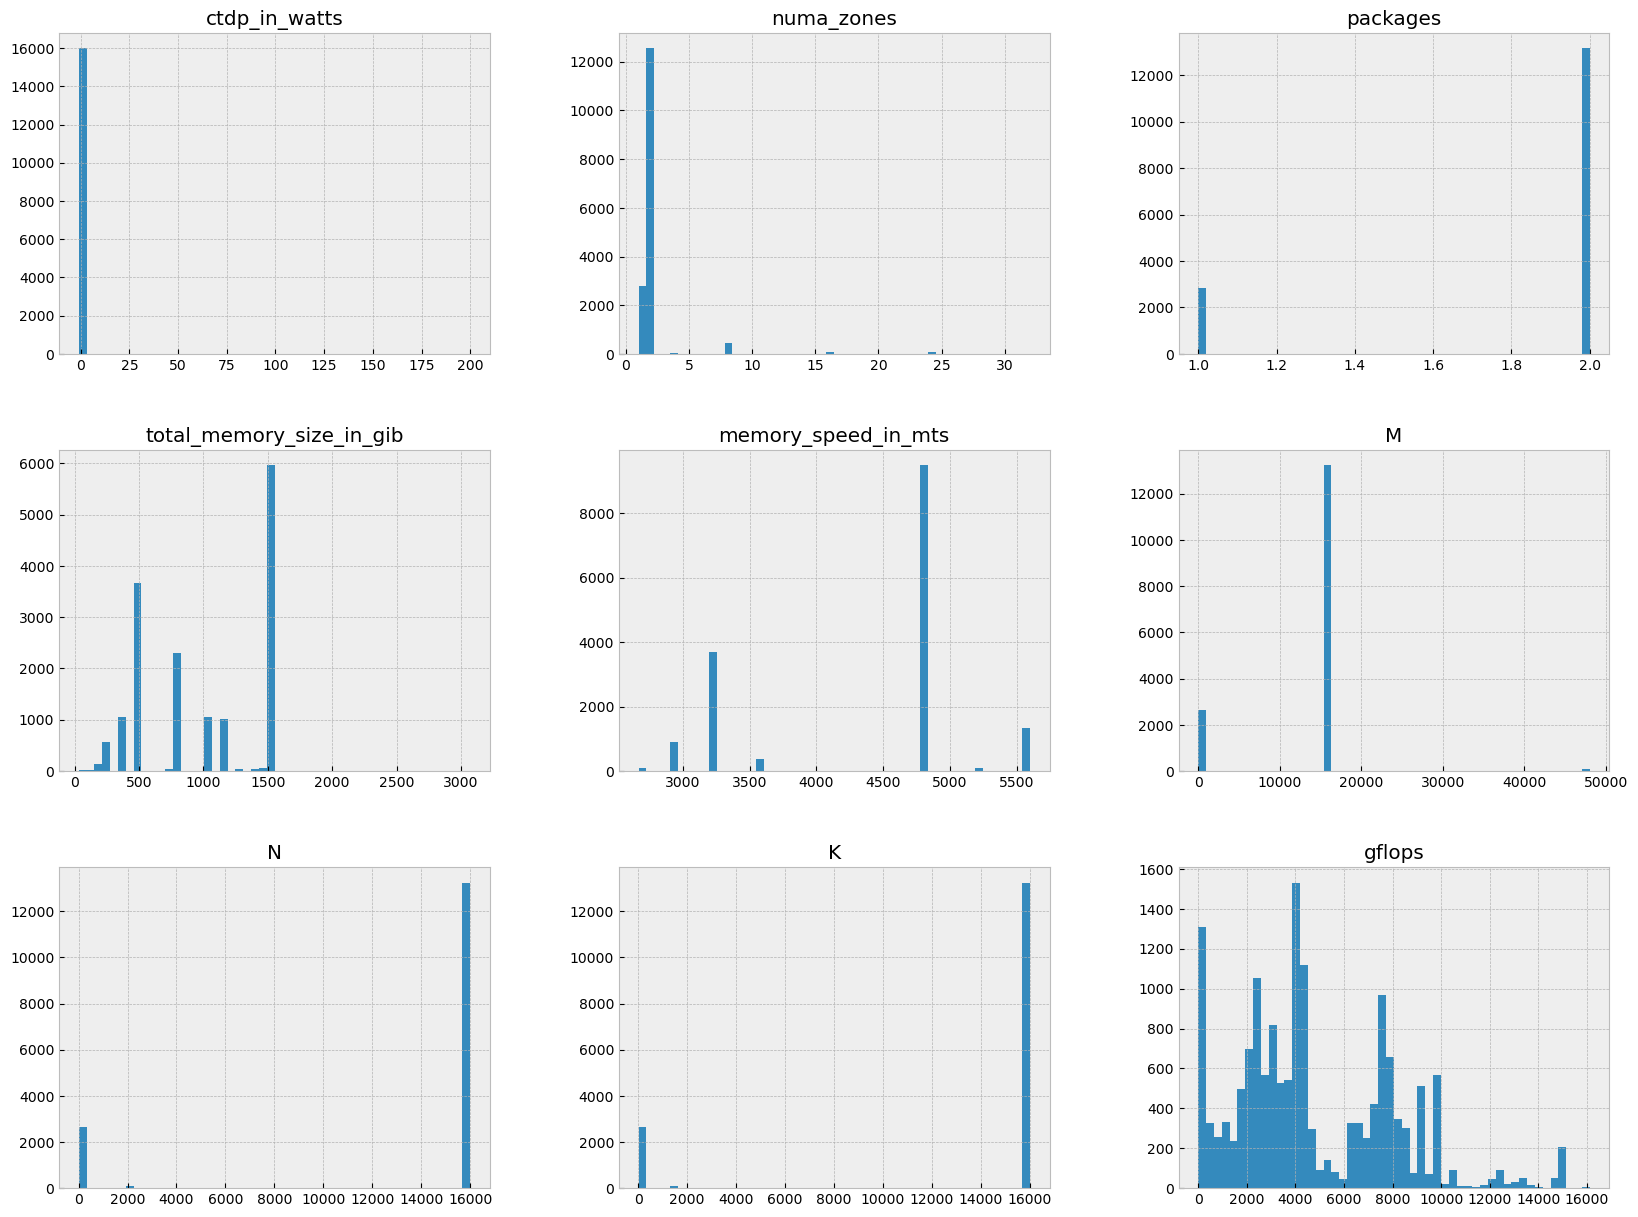

In [474]:
regression_data.hist(bins=50, figsize=(20,15))

It doesn't make it justice when highlighting more dense areas. Let's modify the transparency of each point to help with that:

<Axes: title={'center': 'Scatter Plot:total_memory_size_in_gib vs memory_speed_in_mts '}, xlabel='total_memory_size_in_gib', ylabel='memory_speed_in_mts'>

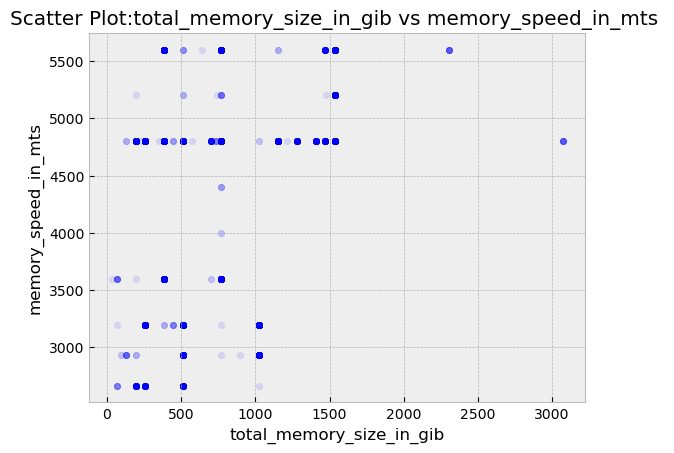

In [475]:
regression_data.plot(kind='scatter', x='total_memory_size_in_gib', y='memory_speed_in_mts', title='Scatter Plot:total_memory_size_in_gib vs memory_speed_in_mts ', alpha=0.1)

# Correlation

We can compute the **(linear) Pearson's correlation** coefficient between pairs of attributes with the method ```corr()```:

In [476]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :

corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

,ctdp_in_watts,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,gflops
ctdp_in_watts,1.000000,1.000000,-0.001800,-0.041681,-0.037756,-0.038850,-0.040070,-0.042898,-0.042858,-0.020243
power_determinism_mode_enabled,1.000000,1.000000,-0.001800,-0.041681,-0.037756,-0.038850,-0.040070,-0.042898,-0.042858,-0.020243
numa_zones,-0.001800,-0.001800,1.000000,0.234725,0.102580,-0.082104,-0.103853,-0.109254,-0.109138,0.051734
packages,-0.041681,-0.041681,0.234725,1.000000,0.494268,-0.119325,-0.128320,-0.161199,-0.161218,0.339335
total_memory_size_in_gib,-0.037756,-0.037756,0.102580,0.494268,1.000000,0.525312,0.379382,0.357889,0.357083,0.497503
memory_speed_in_mts,-0.038850,-0.038850,-0.082104,-0.119325,0.525312,1.000000,0.617408,0.599160,0.597785,0.388576
M,-0.040070,-0.040070,-0.103853,-0.128320,0.379382,0.617408,1.000000,0.830054,0.826998,0.207508
N,-0.042898,-0.042898,-0.109254,-0.161199,0.357889,0.599160,0.830054,1.000000,0.999753,0.169137
K,-0.042858,-0.042858,-0.109138,-0.161218,0.357083,0.597785,0.826998,0.999753,1.000000,0.168299
gflops,-0.020243,-0.020243,0.051734,0.339335,0.497503,0.388576,0.207508,0.169137,0.168299,1.000000


In [477]:
corr_matrix['total_memory_size_in_gib'].sort_values(ascending=True)


power_determinism_mode_enabled   -0.037756
ctdp_in_watts                    -0.037756
numa_zones                        0.102580
K                                 0.357083
N                                 0.357889
M                                 0.379382
packages                          0.494268
gflops                            0.497503
memory_speed_in_mts               0.525312
total_memory_size_in_gib          1.000000
Name: total_memory_size_in_gib, dtype: float64

Another way to check for function, ```scatter_matrix()``` correlation between attributes is to use the pandas which plots every numerical attribute against every other numerical attribute:

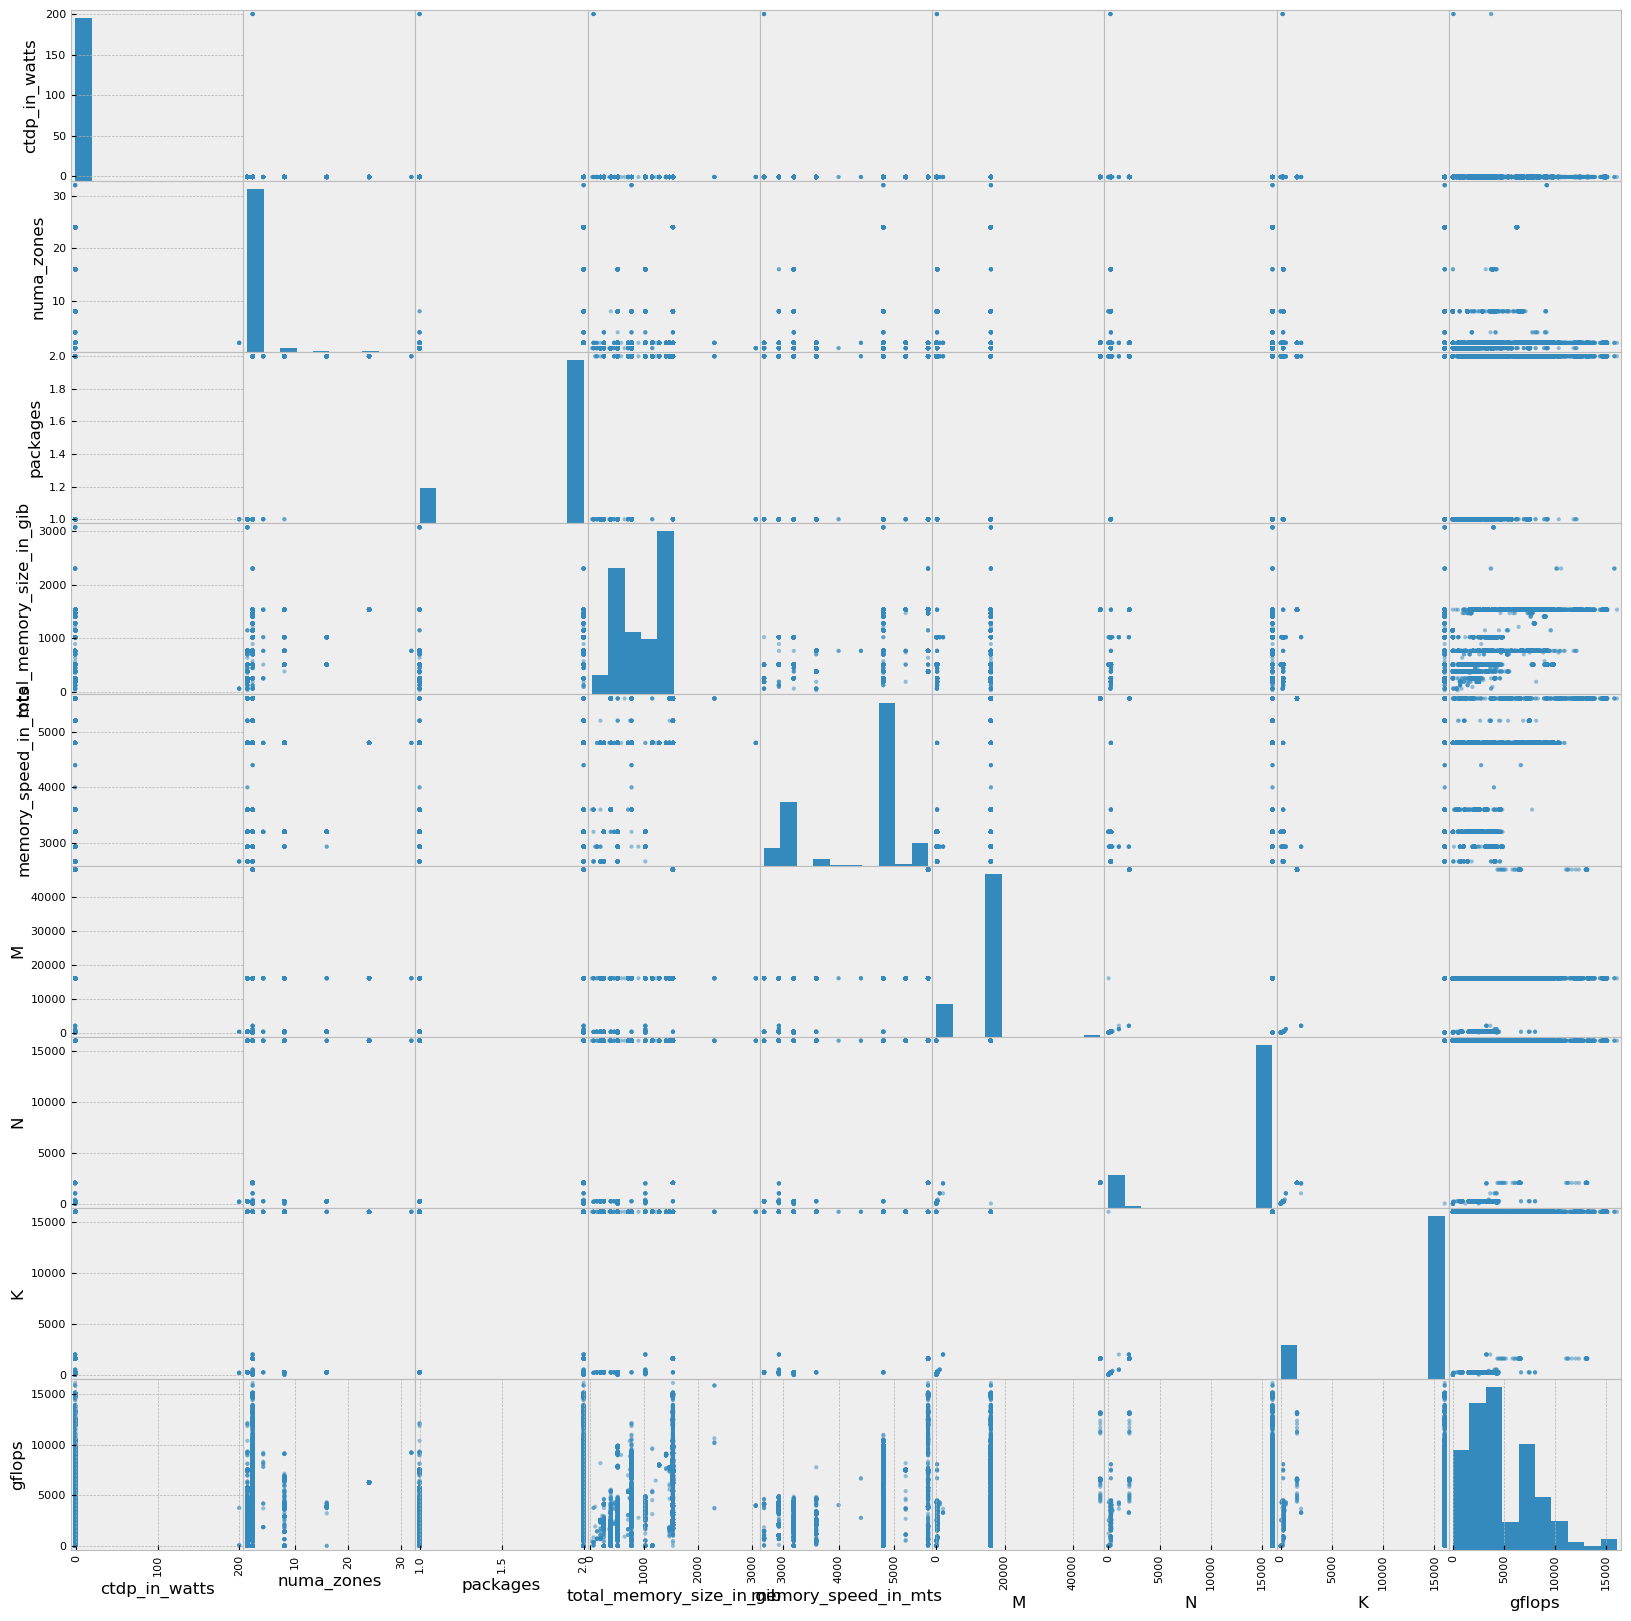

In [478]:
# Select only numeric columns for scatter matrix
numeric_columns = regression_data.select_dtypes(include='number')

# Plot scatter matrix
scatter_matrix(numeric_columns, figsize=(20, 20))
plt.show()


<Axes: xlabel='memory_speed_in_mts', ylabel='total_memory_size_in_gib'>

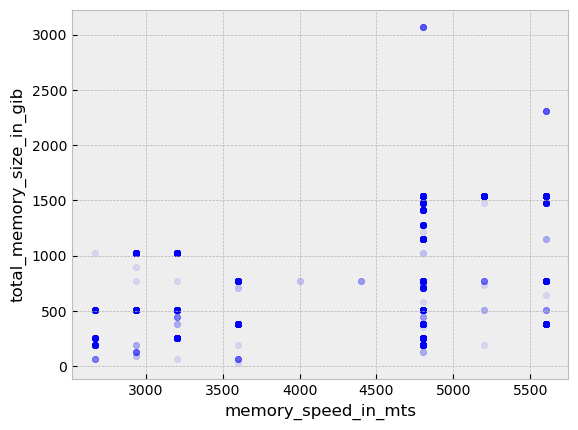

In [479]:
regression_data.plot(kind='scatter', x='memory_speed_in_mts', y='total_memory_size_in_gib', alpha=0.1)

Text(0, 0.5, 'total_memory_size_in_gib')

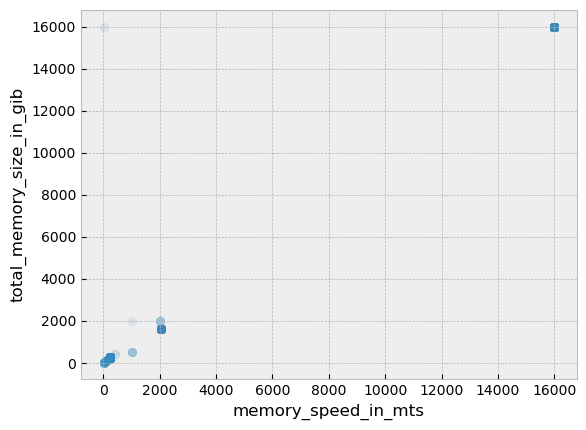

In [480]:
regression_data_np = regression_data.to_numpy()
regression_data_np
plt.scatter(regression_data_np[:,-3], regression_data_np[:,-2], alpha=0.1)
plt.xlabel('memory_speed_in_mts')
plt.ylabel('total_memory_size_in_gib')

# Step3:  Prepare the data for Machine Learning algorithms 

```Scikit-Learn``` provides a few functions to split datasets into multiple subsets in various ways. The simplest function is ```train_test_split()```, which does pretty much the same thing as the function ```split_train_test()```, with a couple of additional features. 

* It includes a ```random_state``` parameter that allows you to set the random generator seed. 

* You can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate ```DataFrame``` for labels).

In [481]:
from sklearn.model_selection import train_test_split

In [482]:
train_set, test_set = train_test_split(regression_data,
 test_size=0.2,
 random_state=42,
 shuffle=True)


In [483]:
train_set

,ctdp_in_watts,cpufreq_scaling_governor,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,gflops
13056,-1.0,performance,False,2,2,2304,5600,16000,16000,16000,10632.77
4560,-1.0,performance,False,24,2,1536,4800,16000,16000,16000,6256.33
921,-1.0,performance,False,1,1,3072,4800,16000,16000,16000,3986.60
13713,-1.0,performance,False,2,2,1152,4800,16000,16000,16000,0.00
1182,-1.0,conservative,False,2,2,768,4800,16000,16000,16000,4921.12
...,...,...,...,...,...,...,...,...,...,...,...
13418,-1.0,performance,False,1,1,768,5600,16000,16000,16000,3852.30
5390,-1.0,performance,False,2,2,768,4800,16000,16000,16000,2695.10
860,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,5433.23
15795,-1.0,performance,False,2,2,1024,3200,16000,16000,16000,4251.13


In [484]:
test_set

,ctdp_in_watts,cpufreq_scaling_governor,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,gflops
15977,-1.0,performance,False,2,2,1536,5600,16000,16000,16000,13666.23
11242,-1.0,ondemand,False,2,2,1024,3200,248,248,248,4198.53
150,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,7353.83
1684,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,6711.89
7496,-1.0,conservative,False,2,2,768,4800,16000,16000,16000,3136.15
...,...,...,...,...,...,...,...,...,...,...,...
7614,-1.0,performance,False,2,2,512,2933,16000,16000,16000,4040.61
4028,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,8222.54
676,-1.0,performance,False,1,1,256,4800,16000,16000,16000,2311.69
14536,-1.0,performance,False,2,2,1536,5600,48000,2048,1600,6587.16


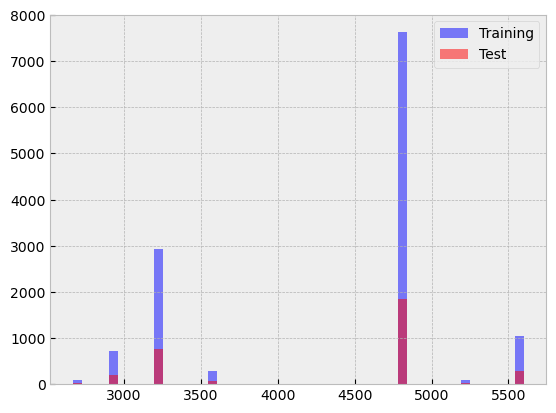

In [485]:
train_set['memory_speed_in_mts'].hist(bins=50, alpha=0.5, color='b', label='Training')
test_set['memory_speed_in_mts'].hist(bins=50, alpha=0.5, color='r', label='Test')
plt.legend();


<Axes: >

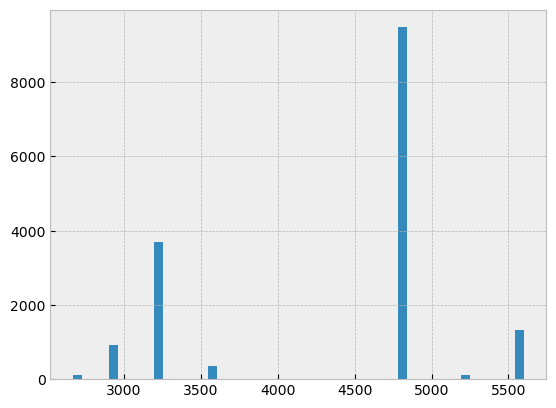

In [486]:
regression_data['memory_speed_in_mts'].hist(bins=50)

In [487]:
regression_data['memory_speed_in_mts'].describe()

count    15988.000000
mean      4351.872217
std        840.330124
min       2667.000000
25%       3200.000000
50%       4800.000000
75%       4800.000000
max       5600.000000
Name: memory_speed_in_mts, dtype: float64

Since this **feature** (or **attribute**) is so valuable, we may want to maintain the prior probabilities of each "category" of median income in the train and test sets.

In [488]:
memory_cat = pd.cut(regression_data['memory_speed_in_mts'],
 bins=[0,1500,3000, 4500, 5000, np.inf],
 labels=[1, 2, 3, 4, 5])
memory_cat

0        4
1        4
2        4
3        4
4        4
        ..
15983    5
15984    5
15985    5
15986    5
15987    5
Name: memory_speed_in_mts, Length: 15988, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

(array([1024.,    0.,    0., 4048.,    0.,    0., 9486.,    0.,    0.,
        1430.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

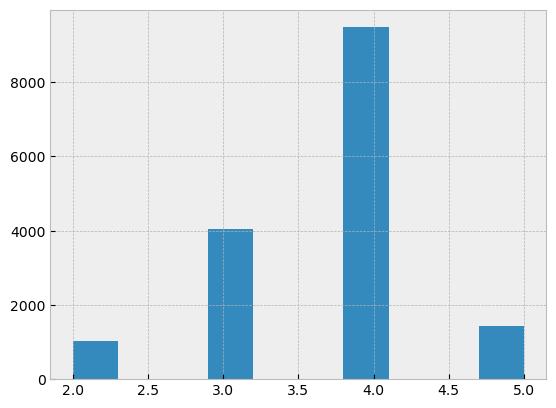

In [489]:
plt.hist(memory_cat)

<div class="alert alert-info" role="alert">
    <b>Stratification</b>
    
Process of partitioning the dataset into subsets while preserving the (categorical) classes prior probabilities the same as in the original dataset. 
    
For example, if a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples in each subset.
</div>

In [490]:
train_set, test_set, memory_cat_train, memory_cat_test = train_test_split(regression_data,memory_cat,test_size=0.2,
                                                                          shuffle=True,
                                                                          random_state=42,
                                                                          stratify=memory_cat)


In [491]:
test_set

,ctdp_in_watts,cpufreq_scaling_governor,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,gflops
8625,-1.0,ondemand,False,2,2,512,3200,16000,16000,16000,2861.25
13849,-1.0,performance,False,2,2,1152,4800,16000,16000,16000,0.00
5832,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,7300.59
6774,-1.0,performance,False,2,2,256,4800,16000,16000,16000,2401.82
15140,-1.0,ondemand,False,2,2,512,3200,248,248,248,4200.78
...,...,...,...,...,...,...,...,...,...,...,...
11948,-1.0,ondemand,False,2,2,1024,3200,248,248,248,4078.33
6135,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,3115.09
4361,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,6222.74
453,-1.0,performance,False,2,2,1536,4800,16000,16000,16000,5423.38


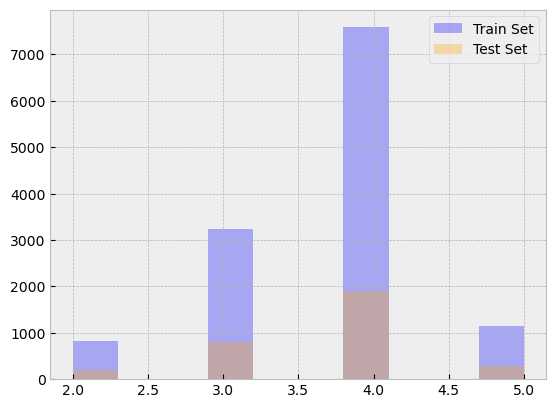

In [492]:
plt.hist(memory_cat_train, color='blue', label='Train Set', alpha=0.3)
plt.hist(memory_cat_test, color='orange', label='Test Set', alpha=0.3)
plt.legend();

# Prepare the Data for Machine Learning Algorithms
In preparing your data for ML algorithms it is often convenient and efficient to build functions to automate feature extraction and data cleaning. This provides with:

1. reproducibility on any dataset,
2. reusability, 
3. apply the same transformations to the test set,
4. ability to incorporate it with your live system, and 
5. carry experiments for design choices.

These transformations can be applied to the features only, the target values only or both. For convenience, let's separate them into two variables:

In [493]:
t_train = train_set['gflops'].copy()
X_train = train_set.drop(labels='gflops', axis=1)
# axis=1 means it's a column in the dataframe

t_train.shape, X_train.shape

((12790,), (12790, 10))

In [494]:
t_test = test_set['gflops'].copy()
X_test = test_set.drop(labels='gflops', axis=1)

t_test.shape, X_test.shape

((3198,), (3198, 10))

In [495]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12790 entries, 13512 to 4301
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ctdp_in_watts                   12790 non-null  float64
 1   cpufreq_scaling_governor        12790 non-null  object 
 2   power_determinism_mode_enabled  12790 non-null  bool   
 3   numa_zones                      12790 non-null  int64  
 4   packages                        12790 non-null  int64  
 5   total_memory_size_in_gib        12790 non-null  int64  
 6   memory_speed_in_mts             12790 non-null  int64  
 7   M                               12790 non-null  int64  
 8   N                               12790 non-null  int64  
 9   K                               12790 non-null  int64  
dtypes: bool(1), float64(1), int64(7), object(1)
memory usage: 1011.7+ KB


## Data Cleaning
In case features have some missing values, you have three options to proceed: 

1. Get rid of the corresponding sample. 

2. Get rid of the whole feature. 

3. Set the values to some value (zero, the mean, the median, etc.). 

```pandas``` dataframes have readily available methods to accomplish this: ```dropna()```, ```drop()```, and ```fillna()```.

In [496]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer

SimpleImputer(strategy='median')

In [497]:
X_train_num = X_train.drop(labels='cpufreq_scaling_governor', axis=1)

X_train_num

,ctdp_in_watts,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K
13512,-1.0,False,1,1,768,5600,16000,16000,16000
12337,-1.0,False,1,1,384,4800,16000,16000,16000
11679,-1.0,False,2,2,512,3200,16000,16000,16000
5647,-1.0,False,2,2,1536,4800,16000,16000,16000
15253,-1.0,False,2,2,256,2667,248,248,248
...,...,...,...,...,...,...,...,...,...
4817,-1.0,False,2,2,1408,4800,16000,16000,16000
7394,-1.0,False,2,2,768,4800,16000,16000,16000
11890,-1.0,False,1,1,384,3600,16000,16000,16000
13868,-1.0,False,2,2,1152,4800,16000,16000,16000


In [498]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In ```scikit-learn```, all the estimator's hyperparameters are accessible directly via public instance variables (e.g., ```imputer.strategy```), and all the estimator's learned parameters are accessible via public instance variables with an underscore suffix (e.g., ```imputer.statistics_```).

In [499]:
imputer.statistics_

array([-1.000e+00,  0.000e+00,  2.000e+00,  2.000e+00,  1.024e+03,
        4.800e+03,  1.600e+04,  1.600e+04,  1.600e+04])

In [500]:
X_train_num.median()

ctdp_in_watts                        -1.0
power_determinism_mode_enabled        0.0
numa_zones                            2.0
packages                              2.0
total_memory_size_in_gib           1024.0
memory_speed_in_mts                4800.0
M                                 16000.0
N                                 16000.0
K                                 16000.0
dtype: float64

In [501]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12790 entries, 13512 to 4301
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ctdp_in_watts                   12790 non-null  float64
 1   power_determinism_mode_enabled  12790 non-null  bool   
 2   numa_zones                      12790 non-null  int64  
 3   packages                        12790 non-null  int64  
 4   total_memory_size_in_gib        12790 non-null  int64  
 5   memory_speed_in_mts             12790 non-null  int64  
 6   M                               12790 non-null  int64  
 7   N                               12790 non-null  int64  
 8   K                               12790 non-null  int64  
dtypes: bool(1), float64(1), int64(7)
memory usage: 911.8 KB


In [502]:
X = imputer.transform(X_train_num)
X.shape

(12790, 9)

In [503]:
# For visualization only

housing_tr = pd.DataFrame(X, 
                          columns=X_train_num.columns, 
                          index=X_train_num.index)

housing_tr

,ctdp_in_watts,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K
13512,-1.0,0.0,1.0,1.0,768.0,5600.0,16000.0,16000.0,16000.0
12337,-1.0,0.0,1.0,1.0,384.0,4800.0,16000.0,16000.0,16000.0
11679,-1.0,0.0,2.0,2.0,512.0,3200.0,16000.0,16000.0,16000.0
5647,-1.0,0.0,2.0,2.0,1536.0,4800.0,16000.0,16000.0,16000.0
15253,-1.0,0.0,2.0,2.0,256.0,2667.0,248.0,248.0,248.0
...,...,...,...,...,...,...,...,...,...
4817,-1.0,0.0,2.0,2.0,1408.0,4800.0,16000.0,16000.0,16000.0
7394,-1.0,0.0,2.0,2.0,768.0,4800.0,16000.0,16000.0,16000.0
11890,-1.0,0.0,1.0,1.0,384.0,3600.0,16000.0,16000.0,16000.0
13868,-1.0,0.0,2.0,2.0,1152.0,4800.0,16000.0,16000.0,16000.0


In [504]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12790 entries, 13512 to 4301
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ctdp_in_watts                   12790 non-null  float64
 1   power_determinism_mode_enabled  12790 non-null  float64
 2   numa_zones                      12790 non-null  float64
 3   packages                        12790 non-null  float64
 4   total_memory_size_in_gib        12790 non-null  float64
 5   memory_speed_in_mts             12790 non-null  float64
 6   M                               12790 non-null  float64
 7   N                               12790 non-null  float64
 8   K                               12790 non-null  float64
dtypes: float64(9)
memory usage: 999.2 KB


In [505]:
X_test

,ctdp_in_watts,cpufreq_scaling_governor,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K
8625,-1.0,ondemand,False,2,2,512,3200,16000,16000,16000
13849,-1.0,performance,False,2,2,1152,4800,16000,16000,16000
5832,-1.0,performance,False,2,2,1536,4800,16000,16000,16000
6774,-1.0,performance,False,2,2,256,4800,16000,16000,16000
15140,-1.0,ondemand,False,2,2,512,3200,248,248,248
...,...,...,...,...,...,...,...,...,...,...
11948,-1.0,ondemand,False,2,2,1024,3200,248,248,248
6135,-1.0,performance,False,2,2,1536,4800,16000,16000,16000
4361,-1.0,performance,False,2,2,1536,4800,16000,16000,16000
453,-1.0,performance,False,2,2,1536,4800,16000,16000,16000


In [506]:
X_test_num = X_test.drop(labels='cpufreq_scaling_governor', axis=1)

X_test_ = imputer.transform(X_test_num)

X_test_.shape

(3198, 9)

Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text feature ```cpufreq_scaling_governor```:

# Handling text - One Hot Encoding

Let's convert the categories to numerical representations. There are 2 options:

1. **Integer encoding**. Each category is encoded to a discrete number (1, 2, 3, etc.). The issue with integer encoding is the fact that we will inject an implicit order in the categories (1 < 2, 1 < 3, etc.) that may not reflect the (physical) properties that feature is describing.

2. **One-Hot Encoding**. Each category is encoded as a sparse vector. That vector will have as many entries as there are categories. They will all be zero except at the integer location that category belongs, in which it will have an entry equal to 1. The challenge with one-hot encoding is that these representations can be very sparse and pose challenges later on in the algorithm design and training.

    * **Binary Encoding**. Choose a binary (or other base) encoding to reduce sparsity while not imposing implicit ordering.
    
3. **Representation Learning**. Alternatively, you could replace each category with a learnable, low-dimensional vector called an *embedding*. Each category's representation would be learned during training. We will see this later in the course.

In [507]:
X_train_cat = X_train[['cpufreq_scaling_governor']]

X_train_cat

,cpufreq_scaling_governor
13512,performance
12337,performance
11679,ondemand
5647,performance
15253,ondemand
...,...
4817,performance
7394,conservative
11890,performance
13868,performance


In [508]:

# Option 1: One hot encoding

from sklearn.preprocessing import OneHotEncoder


In [509]:
cat_encoder = OneHotEncoder()

data_cat_1hot = cat_encoder.fit_transform(X_train_cat)

data_cat_1hot

<12790x6 sparse matrix of type '<class 'numpy.float64'>'
	with 12790 stored elements in Compressed Sparse Row format>

In [510]:
cat_encoder.categories_

[array(['conservative', 'ondemand', 'performance', 'powersave',
        'schedutil', 'unknown'], dtype=object)]

In [511]:
data_cat_1hot.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [512]:
X_train_cat

,cpufreq_scaling_governor
13512,performance
12337,performance
11679,ondemand
5647,performance
15253,ondemand
...,...
4817,performance
7394,conservative
11890,performance
13868,performance


## Feature Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. 

* Note that scaling the target values is generally **not** required. 

There are two common ways to get all attributes to have the same scale: 

1. **Min-Max Scaling**. Values are shifted and rescaled so that they end up ranging from 0 to 1.
    * Highly affected by outliers.
    

2. **Standardization**. First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.
    * Less affected by outliers
    * Gaussianity assumptions

# Transforming Pipelines

In [513]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [514]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler())])

num_pipeline.fit(X_train_num)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [515]:
from sklearn.compose import ColumnTransformer

In [516]:
num_attribs = list(X_train_num.columns) # list with names of the numerical features
cat_attribs = ['cpufreq_scaling_governor']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)])

X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)

In [517]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['ctdp_in_watts',
                                  'power_determinism_mode_enabled',
                                  'numa_zones', 'packages',
                                  'total_memory_size_in_gib',
                                  'memory_speed_in_mts', 'M', 'N', 'K']),
                                ('cat', OneHotEncoder(),
                                 ['cpufreq_scaling_governor'])])

In [518]:
full_pipeline.named_transformers_['cat'].categories_

[array(['conservative', 'ondemand', 'performance', 'powersave',
        'schedutil', 'unknown'], dtype=object)]

In [519]:
attribute_labels=np.hstack((num_attribs, cat_encoder.categories_[0]))

attribute_labels

array(['ctdp_in_watts', 'power_determinism_mode_enabled', 'numa_zones',
       'packages', 'total_memory_size_in_gib', 'memory_speed_in_mts', 'M',
       'N', 'K', 'conservative', 'ondemand', 'performance', 'powersave',
       'schedutil', 'unknown'], dtype=object)

This is the **feature matrix**, the input data used to train a machine learning model.

In [520]:
# Visualizing the data in a dataframe format

data_train_prepared = pd.DataFrame(X_train_processed, 
                                      columns=attribute_labels,
                                      index=train_set.index)

data_train_prepared

,ctdp_in_watts,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,conservative,ondemand,performance,powersave,schedutil,unknown
13512,-0.019776,-0.019776,-0.510370,-2.154488,-0.474791,1.485450,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
12337,-0.019776,-0.019776,-0.510370,-2.154488,-1.278379,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
11679,-0.019776,-0.019776,-0.096862,0.464147,-1.010516,-1.371370,0.377504,0.453408,0.453459,0.0,1.0,0.0,0.0,0.0,0.0
5647,-0.019776,-0.019776,-0.096862,0.464147,1.132384,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
15253,-0.019776,-0.019776,-0.096862,0.464147,-1.546241,-2.005822,-2.074256,-2.215370,-2.212925,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4817,-0.019776,-0.019776,-0.096862,0.464147,0.864521,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
7394,-0.019776,-0.019776,-0.096862,0.464147,-0.474791,0.533177,0.377504,0.453408,0.453459,1.0,0.0,0.0,0.0,0.0,0.0
11890,-0.019776,-0.019776,-0.510370,-2.154488,-1.278379,-0.895233,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
13868,-0.019776,-0.019776,-0.096862,0.464147,0.328796,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0


In [521]:
data_test_prepared = pd.DataFrame(X_test_processed,
                                     columns=attribute_labels,
                                     index=test_set.index)

data_test_prepared

,ctdp_in_watts,power_determinism_mode_enabled,numa_zones,packages,total_memory_size_in_gib,memory_speed_in_mts,M,N,K,conservative,ondemand,performance,powersave,schedutil,unknown
8625,-0.019776,-0.019776,-0.096862,0.464147,-1.010516,-1.371370,0.377504,0.453408,0.453459,0.0,1.0,0.0,0.0,0.0,0.0
13849,-0.019776,-0.019776,-0.096862,0.464147,0.328796,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
5832,-0.019776,-0.019776,-0.096862,0.464147,1.132384,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
6774,-0.019776,-0.019776,-0.096862,0.464147,-1.546241,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
15140,-0.019776,-0.019776,-0.096862,0.464147,-1.010516,-1.371370,-2.074256,-2.215370,-2.212925,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11948,-0.019776,-0.019776,-0.096862,0.464147,0.060934,-1.371370,-2.074256,-2.215370,-2.212925,0.0,1.0,0.0,0.0,0.0,0.0
6135,-0.019776,-0.019776,-0.096862,0.464147,1.132384,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
4361,-0.019776,-0.019776,-0.096862,0.464147,1.132384,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0
453,-0.019776,-0.019776,-0.096862,0.464147,1.132384,0.533177,0.377504,0.453408,0.453459,0.0,0.0,1.0,0.0,0.0,0.0


# Step 4: Select and Train a Model
# MODEL 1 : Multiple Linear Regression
Let's start by using a simple **multiple linear regression** where the goal is to predict a single (continuous) outcome using several explanatory attributes/features.

The **mapper** function takes the form:

\begin{align*}
y = w_0 + w_1 f_1 + w_2 f_2 + \dots + w_M + f_M = w_0 + \sum_{i=1}^M w_i f_i
\end{align*}

where $f_i$ is the $i$-th attribute (or feature), $w_i$ the associated weight parameter and $w_0$ corresponds to the bias term in the multiple linear regression model.

In [522]:
lin_reg = LinearRegression()

lin_reg.fit(data_train_prepared, t_train)

LinearRegression()

In [523]:
lin_reg.coef_

array([ 2.09783172e+13, -2.09783172e+13, -2.46086960e+01,  8.77360840e+02,
        6.62297241e+02,  1.23018555e+03,  1.90232666e+02, -9.44566797e+03,
        9.08342175e+03, -1.31799247e+15, -1.31799247e+15, -1.31799247e+15,
       -1.31799247e+15, -1.31799247e+15, -1.31799247e+15])

In [524]:
lin_reg.coef_[:, np.newaxis].shape

(15, 1)

In [525]:
lin_reg.intercept_

1317992467767518.0

In [526]:

# concatenating all parameters into vector w
w = np.vstack((lin_reg.intercept_, lin_reg.coef_[:,np.newaxis]))
w

array([[ 1.31799247e+15],
       [ 2.09783172e+13],
       [-2.09783172e+13],
       [-2.46086960e+01],
       [ 8.77360840e+02],
       [ 6.62297241e+02],
       [ 1.23018555e+03],
       [ 1.90232666e+02],
       [-9.44566797e+03],
       [ 9.08342175e+03],
       [-1.31799247e+15],
       [-1.31799247e+15],
       [-1.31799247e+15],
       [-1.31799247e+15],
       [-1.31799247e+15],
       [-1.31799247e+15]])

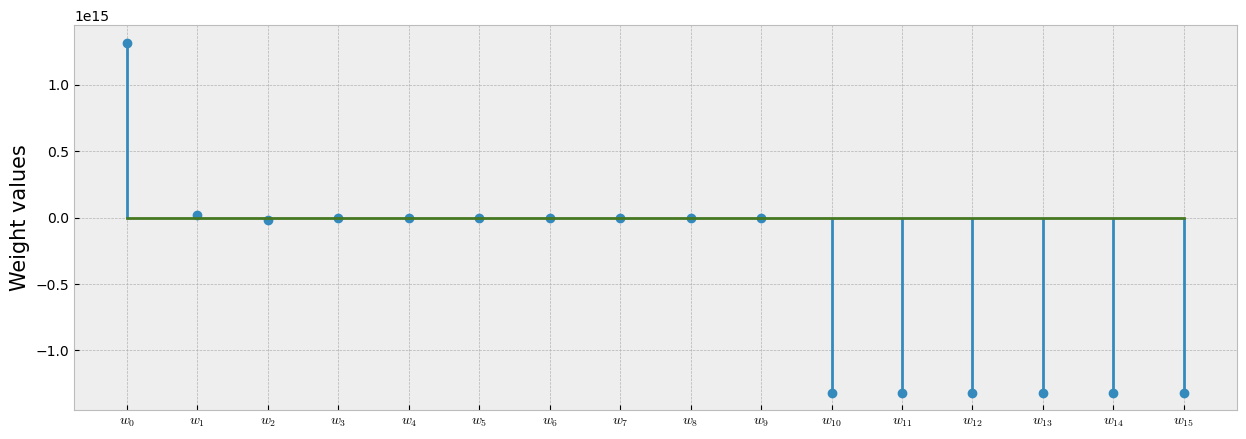

In [527]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

Alternatively, you can create a single pipeline to include preprocessing and the ML algorithm:

In [528]:
from sklearn.linear_model import LinearRegression

model = Pipeline([('preprocessing', full_pipeline),
                 ('lin_reg', LinearRegression())])


In [529]:
model.fit(X_train, t_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['ctdp_in_watts',
                                                   'power_determinism_mode_enabled',
                                                   'numa_zones', 'packages',
                                                   'total_memory_size_in_gib',
                                                   'memory_speed_in_mts', 'M',
                                                   'N', 'K']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cpufreq_scaling_governor'])])),
                ('lin_reg', LinearRegression())])

In [530]:
# Making predictions

y_train = model.predict(X_train)

y_train.shape

(12790,)

# Visualizations

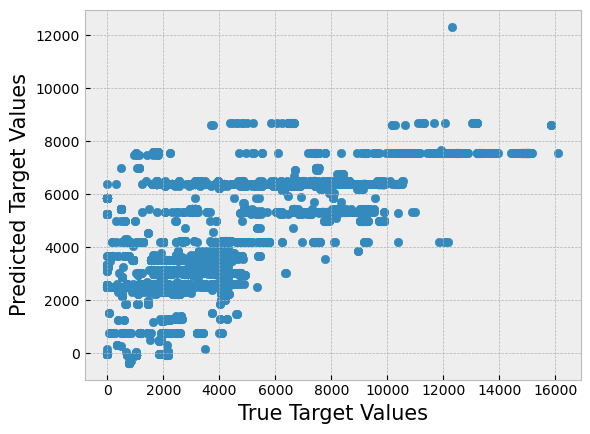

In [531]:
plt.scatter(t_train, y_train)
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15);

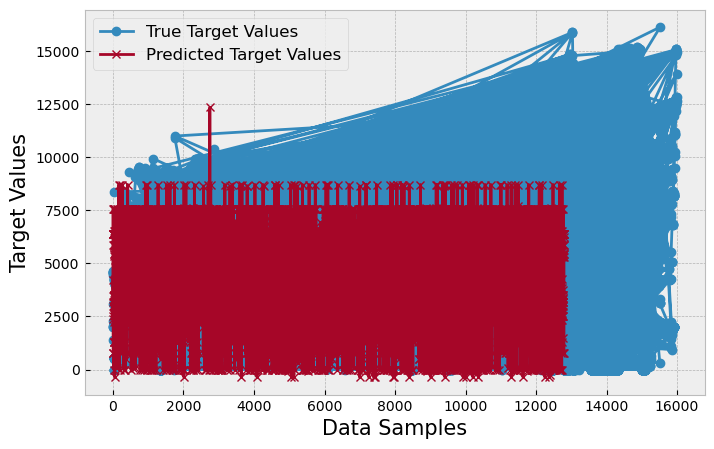

In [532]:
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
plt.plot(t_train, label='True Target Values', marker='o')
plt.plot(y_train, label='Predicted Target Values', marker='x')
plt.xlabel('Data Samples', size=15)
plt.ylabel('Target Values', size=15)
plt.legend(fontsize=12)
plt.show()


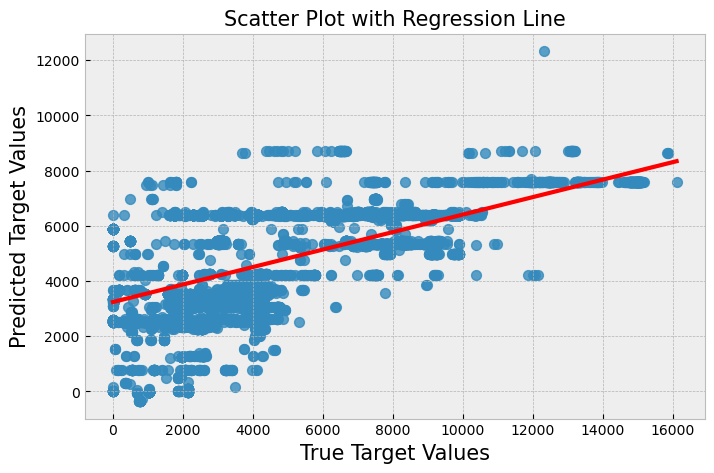

In [533]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
sns.regplot(x=t_train, y=y_train, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15)
plt.title('Scatter Plot with Regression Line', size=15)
plt.show()


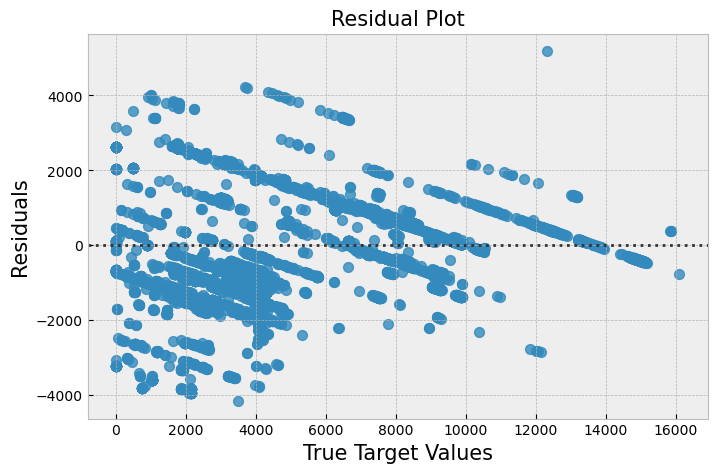

In [534]:
plt.figure(figsize=(8, 5))
sns.residplot(x=t_train.ravel(), y=y_train.ravel(), scatter_kws={'s': 50})
plt.xlabel('True Target Values', size=15)
plt.ylabel('Residuals', size=15)
plt.title('Residual Plot', size=15)
plt.show()


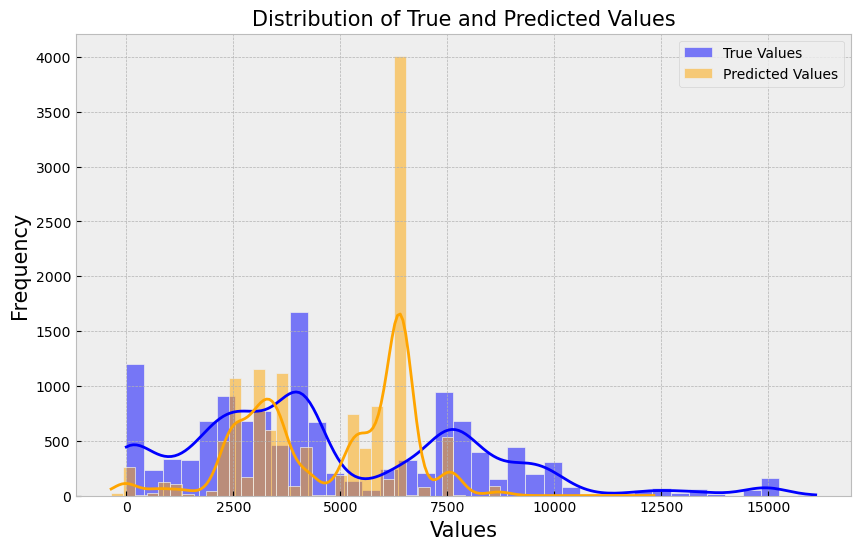

In [535]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()


<Figure size 800x500 with 0 Axes>

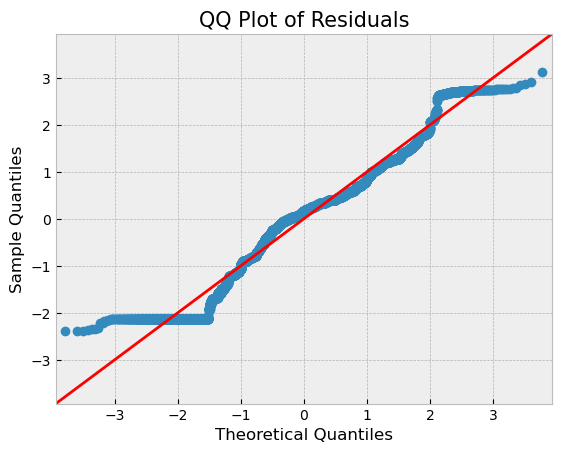

In [536]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = t_train - y_train

plt.figure(figsize=(8, 5))
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals', size=15)
plt.show()


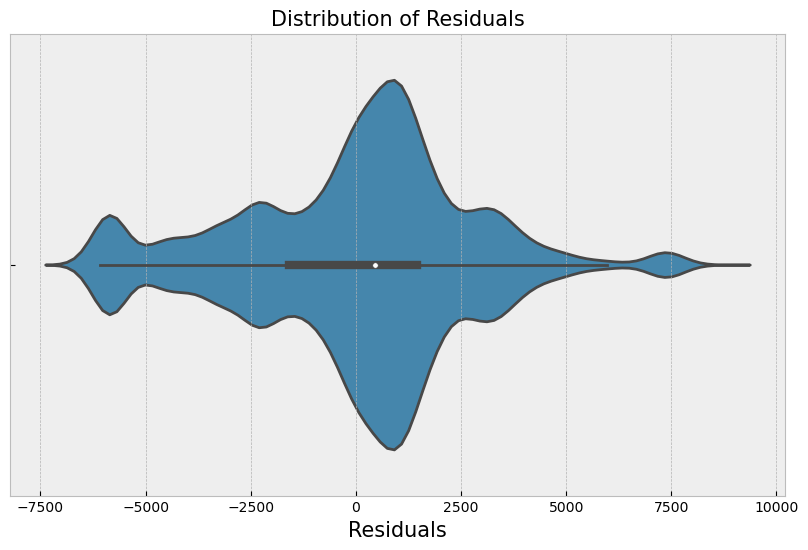

In [537]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = t_train - y_train

plt.figure(figsize=(10, 6))
sns.violinplot(x=residuals)
plt.xlabel('Residuals', size=15)
plt.title('Distribution of Residuals', size=15)
plt.show()


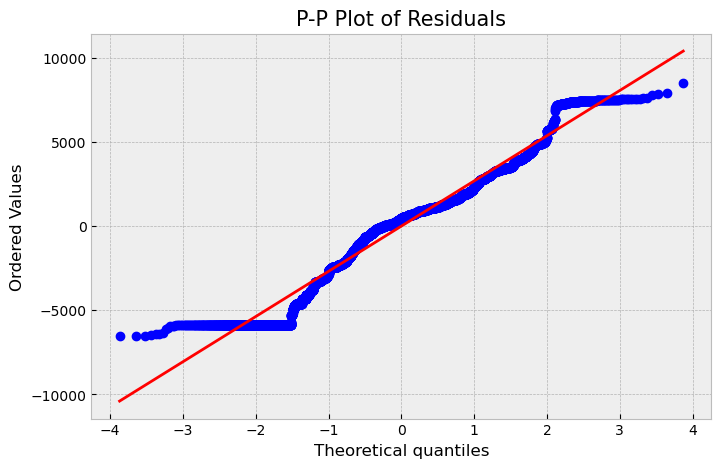

In [538]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = t_train - y_train

plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('P-P Plot of Residuals', size=15)
plt.show()


# Evaluate models
### Other Performance Measures - In Practice

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

In [540]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
r_squared = r2_score(t_train, y_train)

print(f'R-squared: {r_squared}')


R-squared: 0.317123793304141


In [541]:
from sklearn.metrics import mean_squared_error 
# all functions in sklearn.metrics will take (var1, var2)
# var1 is always the target
# var2 is the model prediction

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  2738.028950734331
RMSE Testing Set:  2738.028950734331


In [542]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(t_train, y_train)
mae

2074.2328226505083

# Experimental Design

<div class="alert alert-info">
    <b>Experimental Design - How to use your data without cheating</b> 

In experimental design we need data to train (learn) models, and to test how good the models are. The training data needs to be different (disjoint) from the test data. Otherwise we would be testing the learned model on data it had previously seen, and we would get a biased estimate of the model's generalized performance.
    
Most machine learning algorithms require choosing parameter values (**hyperparemeters**); very often this is done by setting aside some of the training data to evaluate the quality of different parameter settings.
</div>

## Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrence of **overfitting**, but it does not eliminate it entirely.

Let's consider the **MSE** as our performance measure. There are different strategies for implementing cross-validation:

1. **k-fold cross-validation**. Training set is partitioned into $k$ folds.
2. **Leave-One-Out cross-validation**. Extreme case, where only one sample is left for validation.
3. **Stratified cross-validation**. Data is partition such that each class prior probability is preserved.
4. **$k\times 2$ cross-validation**. Training data is partitioned into 2 sets of equal size $k$ times.

### K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

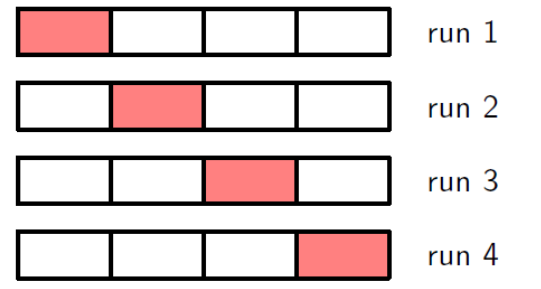

In [543]:
from IPython.display import Image
Image('Capture.PNG',width=400)

In [544]:
from sklearn.model_selection import KFold, StratifiedKFold

lin_scores = cross_val_score(model,
                            X_train,
                            t_train,
                            scoring='neg_mean_squared_error',
                            cv=10)
# to validate on the exact same sample, we should fix the random seed generator for the
# CV scheme using KFold.
# cv=KFold(10, random_state=1)

lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([2792.76971362, 2753.58619454,           nan, 2718.64443706,
       2698.00295162, 2696.20268848, 2720.67441816,           nan,
       2669.79447773, 2817.71297824])

In [545]:
import numpy as np

# Assuming 'scores' is your array of scores
clean_scores =lin_rmse_scores[~np.isnan(lin_rmse_scores)]
print("Mean:", np.mean(clean_scores))
print("Standard deviation:", np.std(clean_scores))


Mean: 2733.42348243116
Standard deviation: 47.56947522658061


In [546]:
import pickle
with open('Linear_Regression.pkl', 'wb') as file:
    pickle.dump(model, file)


# MODEL 2 : DecisionTreeRegressor

In [547]:
from sklearn.tree import DecisionTreeRegressor 

# Define the object
model2 = Pipeline([('preprocess',full_pipeline),
                 ('tree', DecisionTreeRegressor())])

# Train the model
model2.fit(X_train, t_train)

# Make predictions
y_train = model2.predict(X_train)
y_test = model2.predict(X_test)

# Visualizations

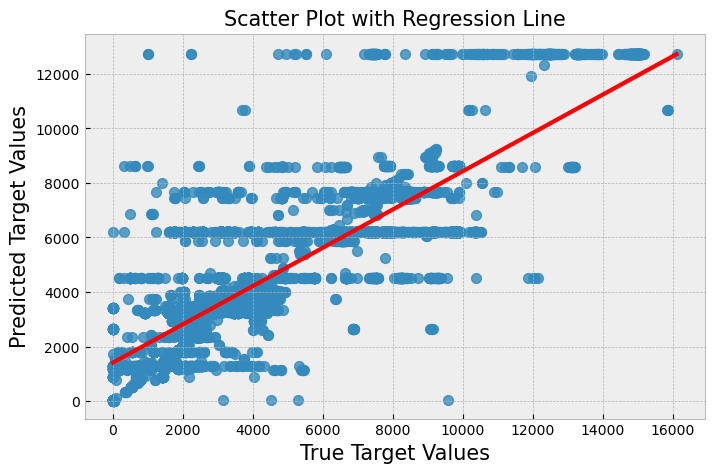

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
sns.regplot(x=t_train, y=y_train, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15)
plt.title('Scatter Plot with Regression Line', size=15)
plt.show()


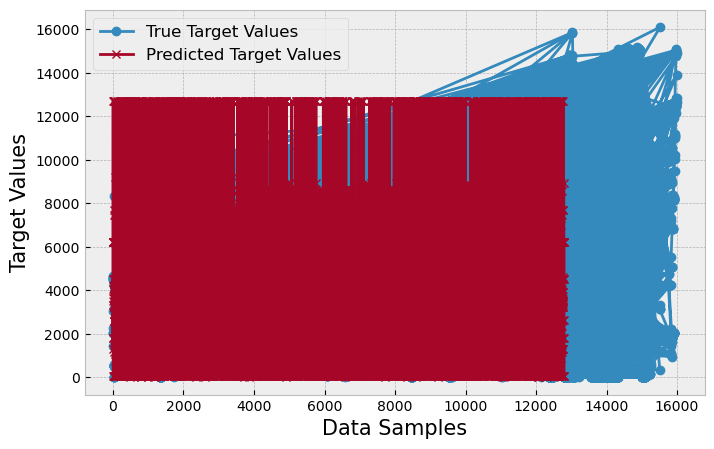

In [549]:
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
plt.plot(t_train, label='True Target Values', marker='o')
plt.plot(y_train, label='Predicted Target Values', marker='x')
plt.xlabel('Data Samples', size=15)
plt.ylabel('Target Values', size=15)
plt.legend(fontsize=12)
plt.show()



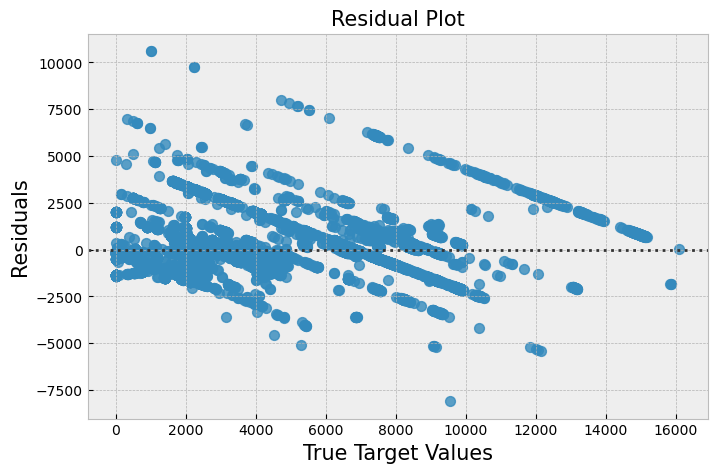

In [550]:
plt.figure(figsize=(8, 5))
sns.residplot(x=t_train.ravel(), y=y_train.ravel(), scatter_kws={'s': 50})
plt.xlabel('True Target Values', size=15)
plt.ylabel('Residuals', size=15)
plt.title('Residual Plot', size=15)
plt.show()


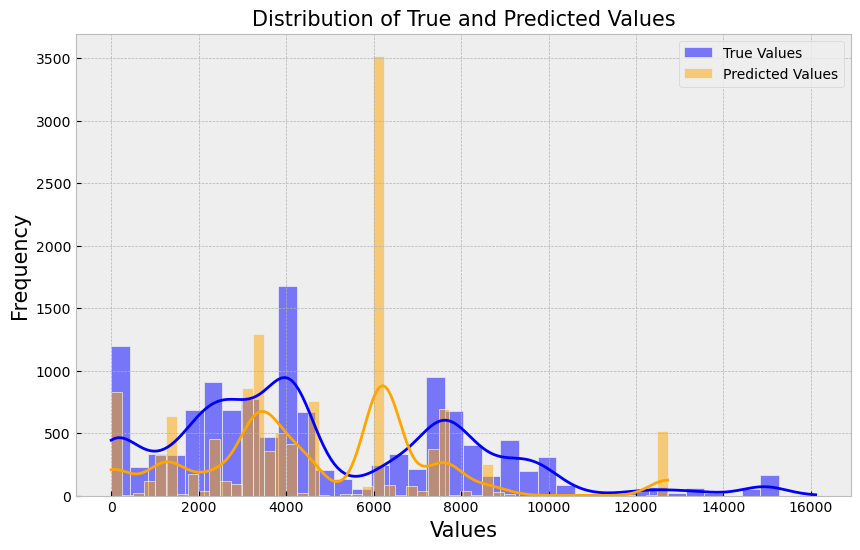

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()


<Figure size 800x500 with 0 Axes>

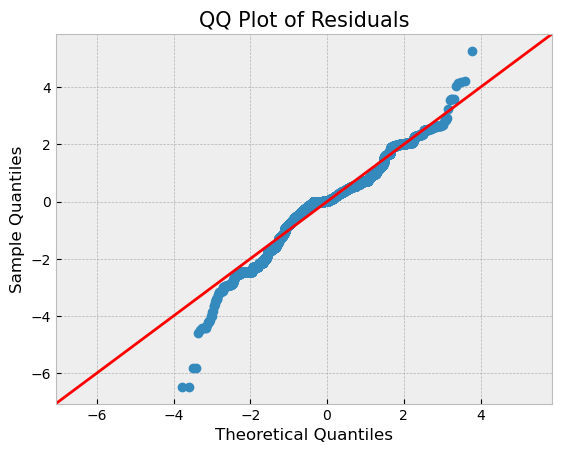

In [552]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = t_train - y_train

plt.figure(figsize=(8, 5))
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals', size=15)
plt.show()


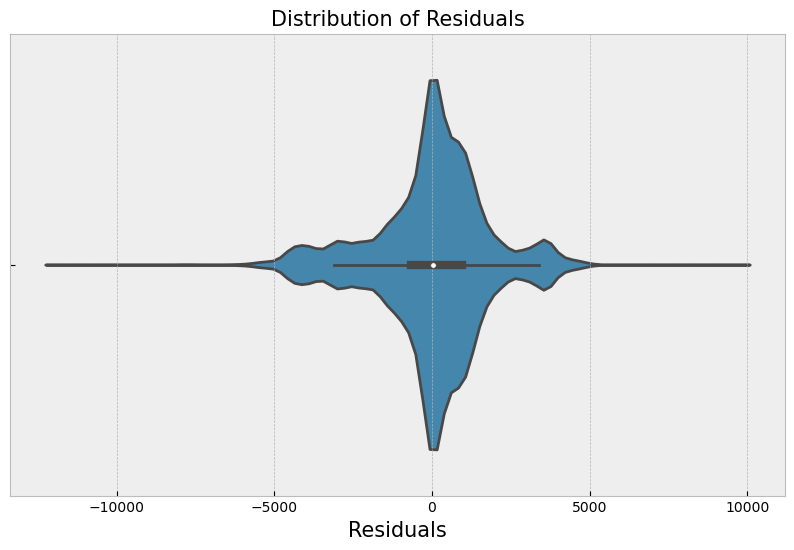

In [553]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = t_train - y_train

plt.figure(figsize=(10, 6))
sns.violinplot(x=residuals)
plt.xlabel('Residuals', size=15)
plt.title('Distribution of Residuals', size=15)
plt.show()


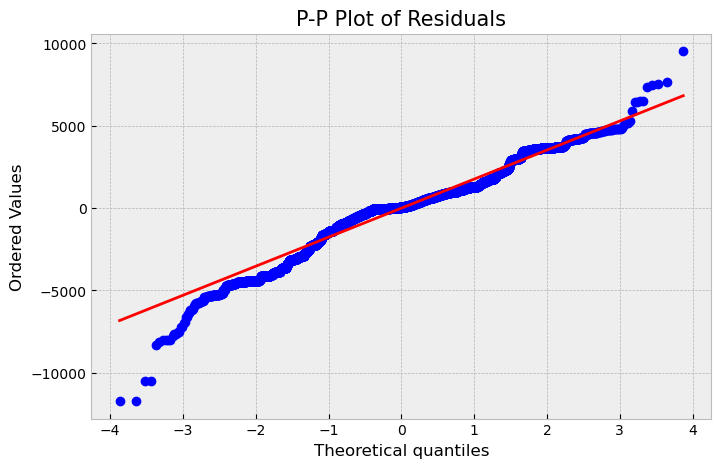

In [554]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = t_train - y_train

plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('P-P Plot of Residuals', size=15)
plt.show()


# Accuracy Evaluations

In [556]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
r_squared = r2_score(t_train, y_train)

print(f'R-squared: {r_squared}')


R-squared: 0.7020130673322552


In [557]:
# Evaluate performance in training
mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)
mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  1808.696321340114
RMSE Testing Set:  1808.696321340114


In [558]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(t_train, y_train)
mae

1257.4292794895284

In [559]:
from sklearn.model_selection import KFold, StratifiedKFold

dreg_scores = cross_val_score(model,
                            X_train,
                            t_train,
                            scoring='neg_mean_squared_error',
                            cv=20)
# to validate on the exact same sample, we should fix the random seed generator for the
# CV scheme using KFold.
# cv=KFold(10, random_state=1)

dreg_rmse_scores = np.sqrt(-lin_scores)

In [560]:
import numpy as np

# Assuming 'scores' is your array of scores
clean_scores = dreg_rmse_scores[~np.isnan(dreg_rmse_scores)]

print("Mean:", np.mean(clean_scores))
print("Standard deviation:", np.std(clean_scores))


Mean: 2733.42348243116
Standard deviation: 47.56947522658061


In [561]:
#joblib.dump(model2, 'DecisionTreeRegressor.pkl')
import pickle
with open('DecisionTreeRegressor.pkl', 'wb') as file:
    pickle.dump(model2, file)


# MODEL 3:RandomForestRegressor
```RandomForestRegressor```. (We will study this model in detail later on in the course.)

Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further.

In [562]:
from sklearn.ensemble import RandomForestRegressor

# Define object
model3 = Pipeline([('preprocess',full_pipeline),
                  ('random_forest', RandomForestRegressor())])

# Train model
model3.fit(X_train, t_train)
# Make predictions
y_train = model3.predict(X_train)
y_test = model3.predict(X_test)

# Visualizations

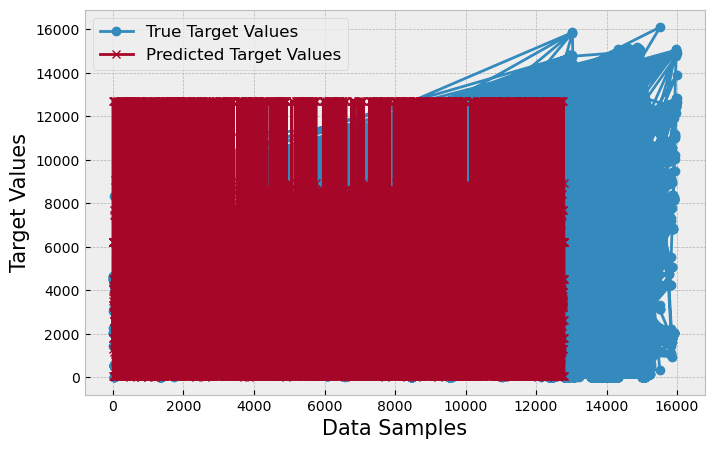

In [563]:
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
plt.plot(t_train, label='True Target Values', marker='o')
plt.plot(y_train, label='Predicted Target Values', marker='x')
plt.xlabel('Data Samples', size=15)
plt.ylabel('Target Values', size=15)
plt.legend(fontsize=12)
plt.show()



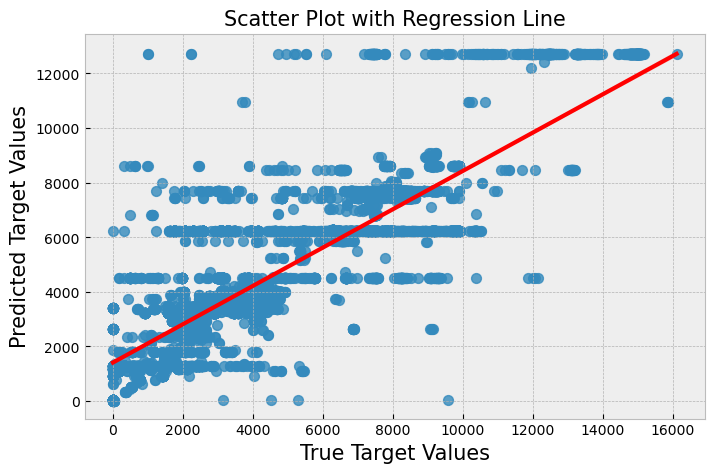

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
sns.regplot(x=t_train, y=y_train, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15)
plt.title('Scatter Plot with Regression Line', size=15)
plt.show()


# Accuracy Evaluations

In [565]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
r_squared = r2_score(t_train, y_train)

print(f'R-squared: {r_squared}')


R-squared: 0.7018021565931561


In [566]:
# Evaluate performance in training
mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)
mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  1809.3362923584443
RMSE Testing Set:  1809.3362923584443


In [567]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(t_train, y_train)
mae

1259.1278271683987

In [568]:
# CV
forest_scores = cross_val_score(model3,
                               X_train,
                               t_train,
                               scoring='neg_mean_squared_error',
                               cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)


In [569]:
import numpy as np

# Assuming 'scores' is your array of scores
clean_scores =forest_scores[~np.isnan(forest_rmse_scores )]

print("Mean:", np.mean(clean_scores))
print("Standard deviation:", np.std(clean_scores))


Mean: -3289972.4172751317
Standard deviation: 176542.11454626656


In [570]:
joblib.dump(model3, 'RandomForestRegressor.pkl')
print(type(model3))

<class 'sklearn.pipeline.Pipeline'>


In [571]:
import pickle
with open('RandomForestRegressor.pkl', 'wb') as file:
    pickle.dump(model3, file)



# MODEL 4: 
# Fine-tuning the Hyperparameters
### Ridge Regularizer

The Ridge regularizer, also known as the L2-Norm regularizer or weight decay, adds a term with the squared sum of the weights scaled by the hyperparameter $\lambda$. 

\begin{align*}
R^{(L2)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M w_i^2 \\
&= \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the objective function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

* The hyperparameter $\lambda$ controls how much you want to regularize the model. If $\lambda$ is 0 then the learning algorithm will just minimize the error term in the cost function. If $\lambda$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

### Lasso Regularizer

The Lasso regularizer, also known as the L1-norm regularizer, it adds a term with the L1-norm of the weight vector $\mathbf{w}$ scaled by the hyperparameter $\lambda$. $\lambda$ here has the same tradeoff responsibility.

\begin{align*}
R^{(L1)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M |w_i| \\
&= \lambda \Vert\mathbf{w}\Vert_1
\end{align*}

* An important characteristic of the Lasso regularizer is that it tends to eliminate the weights of the least important features by setting them to zero. This is known as **sparsity**.

### Elastic Net Regularizer

Elastic Net is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio with the hyperparameter $\beta$.

\begin{align*}
R^{(L12)}_{\mathbf{w}} &= \beta\lambda \sum_{i=0}^M |w_i| + (1-\beta) \lambda \sum_{i=0}^M w_i^2 \\
&= \beta R^{(L1)}_{\mathbf{w}} + (1-\beta) R^{(L2)}_{\mathbf{w}}
\end{align*}

In [572]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [573]:
model4 = Pipeline([('preprocess',full_pipeline),
    ('poly_feat', PolynomialFeatures()),
                 ('ridge_reg', Ridge())])

model4

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['ctdp_in_watts',
                                                   'power_determinism_mode_enabled',
                                                   'numa_zones', 'packages',
                                                   'total_memory_size_in_gib',
                                                   'memory_speed_in_mts', 'M',
                                                   'N', 'K']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cpufreq_scaling_governor'])])),
                ('poly_feat', PolynomialFeatures()), ('ridge_reg', Ridge())])

In [574]:
model4.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('std_scaler',
                                                     StandardScaler())]),
                                    ['ctdp_in_watts',
                                     'power_determinism_mode_enabled',
                                     'numa_zones', 'packages',
                                     'total_memory_size_in_gib',
                                     'memory_speed_in_mts', 'M', 'N', 'K']),
                                   ('cat', OneHotEncoder(),
                                    ['cpufreq_scaling_governor'])])),
  ('poly_feat', PolynomialFeatures()),
  ('ridge_reg', Ridge())],
 'verbose': False,
 'preprocess': ColumnTransformer(transformers=[('num',
                     

## Strategies of Experimentation

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

A few strategies for fine-tuning hyperparameters include:

* Best guess
* One factor at a time
* Factorial design or **grid search**
* Randomized search

# Grid Search
One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get ```Scikit-Learn```'s ```GridSearchCV``` to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searches for the best combination of hyperparameter values for the Polynomial Regression with Ridge regularization.

In [575]:
# param_grid = {'poly_feat__degree': range(1,11),
#              'ridge_reg__alpha': [0.01, 0.05, 0.1, 0.5, 1]}

param_grid = {
    'poly_feat__degree': [4],
  'ridge_reg__alpha':[1],
}


In [576]:
# grid_search.fit(data_train_prepared, t_train)
grid_search = GridSearchCV(model4, param_grid, cv=5, n_jobs=-1)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['ctdp_in_watts',
                                                                          'power_determinism_mode_enabled',
                                                                          'numa_zones',
                                                                          'packages',
                                                                          'total_memory_size_in_gib',
                                                                          'memory_speed_in_mts',
                                                                          'M',
                                                                          'N',
                                                                          'K']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['cpufreq_scaling_governor'])])),
                                       ('poly_feat', PolynomialFeatures()),
                                       ('ridge_reg', Ridge())]),
             n_jobs=-1,
             param_grid={'poly_feat__degree': [4], 'ridge_reg__alpha': [1]})

In [577]:
grid_search.fit(X_train, t_train)
grid_search.best_params_


{'poly_feat__degree': 4, 'ridge_reg__alpha': 1}

In [578]:
grid_search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['ctdp_in_watts',
                                                   'power_determinism_mode_enabled',
                                                   'numa_zones', 'packages',
                                                   'total_memory_size_in_gib',
                                                   'memory_speed_in_mts', 'M',
                                                   'N', 'K']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cpufreq_scaling_governor'])])),
                ('poly_feat', PolynomialFeatures(degree=4)),
                ('ridge_reg', Ridge(alpha=1))])

In [579]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([30.87063284]),
 'std_fit_time': array([29.40937133]),
 'mean_score_time': array([0.06032677]),
 'std_score_time': array([0.03171228]),
 'param_poly_feat__degree': masked_array(data=[4],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_ridge_reg__alpha': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'poly_feat__degree': 4, 'ridge_reg__alpha': 1}],
 'split0_test_score': array([0.59853917]),
 'split1_test_score': array([nan]),
 'split2_test_score': array([0.63077984]),
 'split3_test_score': array([nan]),
 'split4_test_score': array([0.64095302]),
 'mean_test_score': array([nan]),
 'std_test_score': array([nan]),
 'rank_test_score': array([1])}

In [580]:
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_poly_feat__degree', 'param_ridge_reg__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [581]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), params)

nan {'poly_feat__degree': 4, 'ridge_reg__alpha': 1}


In [582]:
model4 = grid_search.best_estimator_

model4

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['ctdp_in_watts',
                                                   'power_determinism_mode_enabled',
                                                   'numa_zones', 'packages',
                                                   'total_memory_size_in_gib',
                                                   'memory_speed_in_mts', 'M',
                                                   'N', 'K']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cpufreq_scaling_governor'])])),
                ('poly_feat', PolynomialFeatures(degree=4)),
                ('ridge_reg', Ridge(alpha=1))])

In [583]:
# Predictions
y_train = model4.predict(X_train)
y_test = model4.predict(X_test)
y_train
y_test

array([3318.26123282,  816.5144458 , 6266.55043867, ..., 6266.55043867,
       6266.55043867, 7007.70365342])

# Accuracy Evaluations

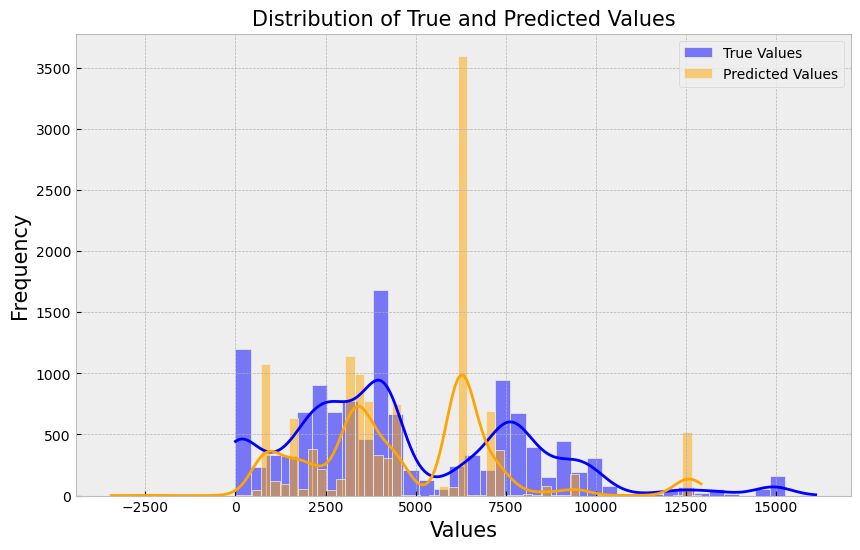

In [584]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()

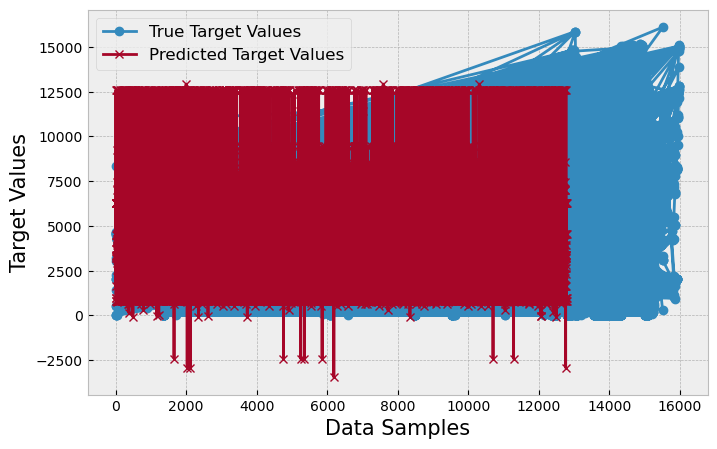

In [585]:
import matplotlib.pyplot as plt

# Assuming 't_train' contains the true target values and 'y_train' contains the predicted values
plt.figure(figsize=(8, 5))
plt.plot(t_train, label='True Target Values', marker='o')
plt.plot(y_train, label='Predicted Target Values', marker='x')
plt.xlabel('Data Samples', size=15)
plt.ylabel('Target Values', size=15)
plt.legend(fontsize=12)
plt.show()


In [586]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
r_squared = r2_score(t_train, y_train)

print(f'R-squared: {r_squared}')


R-squared: 0.6542722215493457


In [587]:
from sklearn.metrics import mean_squared_error

model4_rmse_train = np.sqrt(mean_squared_error(t_train, y_train))
print('RMSE Train: ', model4_rmse_train)

model4_rmse_test = np.sqrt(mean_squared_error(t_test, y_test))
print('RMSE Test: ', model4_rmse_test)

RMSE Train:  1948.2028895571216
RMSE Test:  1957.106779024647


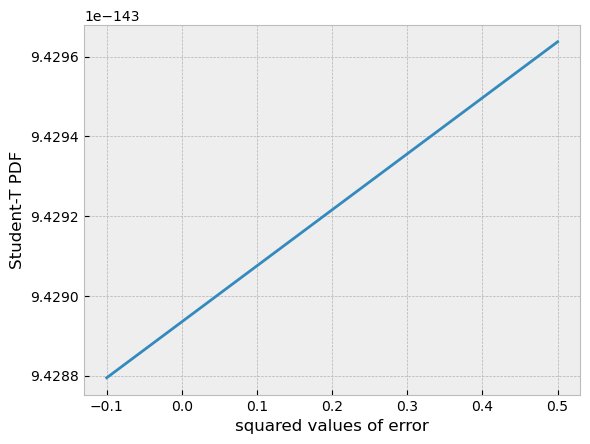

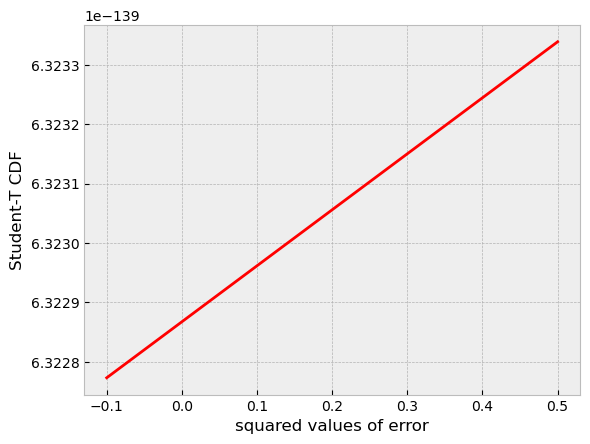

In [588]:
from scipy import stats

confidence = 0.95

squared_errors = (t_test - y_test) ** 2

#Student's T random variable with degrees of freedom (dof) = N-1
T = stats.t(df=len(squared_errors)-1, 
            loc=squared_errors.mean(),
            scale=squared_errors.std(ddof=1)/np.sqrt(len(squared_errors)))

tline = np.linspace(-0.1,0.5,100)

plt.plot(tline, T.pdf(tline));
plt.xlabel('squared values of error')
plt.ylabel('Student-T PDF')
plt.show();

plt.plot(tline,T.cdf(tline),'r');
plt.xlabel('squared values of error')
plt.ylabel('Student-T CDF');

In [589]:
import pickle
with open('poly_ridge_hyperparameter.pkl', 'wb') as file:
    pickle.dump(model4, file)


# Experiment Result : 
<div class="alert alert-info">

# Model 1 : Multiple Linear Regression
### RMSE : 2738.028950734331
### R2 Score : 0.317123793304141

# Model 2 : Decision Tree Regressor
### RMSE   1808.696321340114
### R2 Score :   0.7020130673322552


# Model 3 : Random Forest Regressor
### RMSE : 1808.696321340114
### R2 Score :   0.7020130673322552

# Model 4 : Ridge + PolynomialFeatures
### RMSE   1948.2028895571216
### R2 Score :  0.6542722215493457

<div/>



## Best Model :  Decision Tree Regressor | Random Forest Regressor
### RMSE : 1808.696321340114
### R2 Score : 0.7020130673322552